In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
data = load_breast_cancer()

data.data.shape

#569个样本，30个特征，可以预见，很可能过拟合

(569, 30)

In [13]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [14]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [15]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [16]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [17]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
score_pre = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
score_pre

0.9649122807017545

# 随机森林调参第一步：n_estimators

0.9649122807017545 111


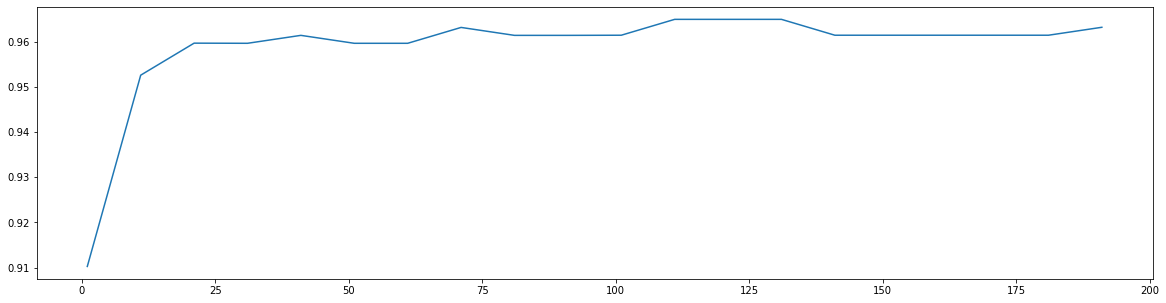

In [18]:
# 备注看文档
scorel = []

for i in range(0, 200, 10):
        rfc = RandomForestClassifier(n_estimators=i +1
        ,n_jobs = -1
        ,random_state=0)
    
        score = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
        scorel.append(score)
        
print(max(scorel), (scorel.index(max(scorel))*10) + 1)
plt.figure(figsize=[20,5])
plt.plot(range(1, 201, 10), scorel)
plt.show()

0.9666666666666666 110


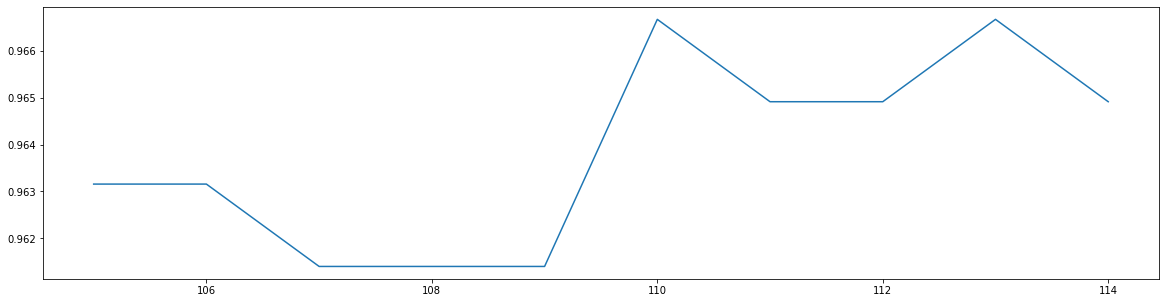

In [21]:
# 上面给出的结果是，在111附近【左右】，有一个峰值，单没不是确定值 【因为我们选择的步长是10】
# 所以，需要继续缩小范围，继续观察

# 备注看文档
scorel = []

for i in range(105, 115):
        rfc = RandomForestClassifier(n_estimators=i
        ,n_jobs = -1
        ,random_state=0)
    
        score = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
        scorel.append(score)
        
print(max(scorel), ([*range(105, 115)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(105,115), scorel)
plt.show()

In [ ]:
# 所以，通过这个学习曲线，确定的n_estimator 这个参数的最优值为110

# 接下来，按照参数对模型准确率的影响程度进行调参：

## 首先，调整max_depth

In [22]:
# 备注看文档
# max_depth 更应该使用学习曲线，去观察最优解【但是，视频中，由于学习曲线绘制慢，才使用的网格搜索】

param_grid = {'max_depth' : np.arange(1, 20, 1)}

rfc = RandomForestClassifier(n_estimators=110, random_state=0)

GS = GridSearchCV(rfc, param_grid, cv = 10)
GS.fit(data.data, data.target)

print(GS.best_params_)
GS.best_score_

0.9666666666666666

In [23]:
GS.best_params_

{'max_depth': 11}

## 其次，正常调整另外两个控制叶子的参数[min_samples_leaf  和 min_samples_split]，这两个特征和max_depth一样，都是将模型往左推的【即降低模型的复杂度】，但是，现在通过网格搜索找到的，最大深度的最优参数是11，但是模型准确率缺没有提升，甚至像视频中的，准确率都是下降的。所以就说明，现在模型属于泛化误差的最低点。所以就不能降低模型复杂度了，进而，也就不需要调整， 能够降低模型复杂度的相关参数


- 不过，现在我的模型是准确率没变，我认为另外两个也不需要调整，但是实际还需要自己调整试试

## 接下来，调整max_features

In [24]:
# 备注看文档
# 现在模型，准确率偏左边，那说明模型太简单，所以需要将模型网右移，即增加模型的准确率
# 针对max_features参数，sklearn默认的参数是特征数量开平方，大概是5.X的数据
# 所以为了增加模型复杂度，那么需要增加特征数量，所以这里特征数量的数据范围是5 - 30【30是全部特征的数量】

param_grid = {'max_features' : np.arange(5, 30, 1)}

rfc = RandomForestClassifier(n_estimators=110, random_state=0)

GS = GridSearchCV(rfc, param_grid, cv = 10)
GS.fit(data.data, data.target)

print(GS.best_params_)
GS.best_score_

{'max_features': 7}


0.968421052631579

## 继续调整min_samples_leaf

-  我的模型和视频的不大一样，调整完最大特征数后，显示出，特征数为7的时候，模型的准确率上升了

In [26]:
# 备注看文档

param_grid = {'min_samples_leaf' : np.arange(1, 1 + 10, 1)}

rfc = RandomForestClassifier(n_estimators=110, random_state=0, max_features=7)

GS = GridSearchCV(rfc, param_grid, cv = 10)
GS.fit(data.data, data.target)

print(GS.best_params_)
GS.best_score_

{'min_samples_leaf': 1}


0.968421052631579

In [27]:
# 模型准确率为变化

## 继续调整min_samples_split

In [28]:
# 备注看文档

param_grid = {'min_samples_split' : np.arange(2, 2+20, 1)}

rfc = RandomForestClassifier(n_estimators=110, random_state=0, max_features=7)

GS = GridSearchCV(rfc, param_grid, cv = 10)
GS.fit(data.data, data.target)

print(GS.best_params_)
GS.best_score_

{'min_samples_split': 2}


0.968421052631579

In [29]:
# 和上面的预测一样，这两个参数，不足以增加模型的准确率

## 最后调整一下criterion参数 -- 一般不知道这个参数对模型的效果，就是试试

In [30]:
# 备注看文档

param_grid = {'criterion' : ['gini', 'entropy']}

rfc = RandomForestClassifier(n_estimators=110, random_state=0, max_features=7)

GS = GridSearchCV(rfc, param_grid, cv = 10)
GS.fit(data.data, data.target)

print(GS.best_params_)
GS.best_score_

{'criterion': 'entropy'}


0.9719298245614036

In [31]:
# 发现，采用交叉熵，模型的准去率又提升了，达到了97%的样子
# 我觉得，这个时候，可以再试试其他参数【因为不像视频中，是没变化的】 - 但是这个模型，比视频中的准确率还高
# 所以，这是最有模型是如下

In [32]:
rfc = RandomForestClassifier(n_estimators=110, random_state=0, max_features=7, criterion = 'entropy')
    
score = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
score

0.9719298245614036

In [ ]:
# 参数，只要采用网格搜索，他就一定会给调整出一个最优的参数，所以，如果自己能判断某个参数不需要调整了，那就可以不进行